# Homework I - Report

Cecília Correia, 106827
<br>Patrícia Gameiro, 107245

## Programming [9v]

**Consider the diabetes.arff data available at the homework tab, comprising 8 biological
features to classify 768 patients into 2 classes (normal, diabetes).**

### 1) [1v]

**ANOVA is a statistical test that can be used to assess the discriminative power of a single input variable. Using `f_classif` from `sklearn`, identify the input variables with the worst and best discriminative power. Plot their class-conditional probability density functions.**

**Using sklearn, apply a stratified 70-30 training-testing split with a fixed seed
(`random_state=1`), and assess in a single plot the training and testing accuracies of a decision tree
with no depth limits (and remaining default behavior) for a varying number of selected features
in `{5,10,40,100,250,700}`. Feature selection should be performed before decision tree learning
considering the discriminative power of the input variables according to mutual information
criterion (`mutual_info_classif`).**

In [1]:
from scipy.io.arff import loadarff
from sklearn import model_selection, tree, metrics
from sklearn.feature_selection import f_classif
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the ARFF file
data = loadarff("./data/diabetes.arff")
df = pd.DataFrame(data[0])
df["Outcome"] = df["Outcome"].str.decode("utf-8")

In [3]:
# Separate features from the outcome 
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [4]:
fimportance = f_classif(X, y)

max_f_index = fimportance[0].argmax()  
min_f_index = fimportance[0].argmin()  

print(f"Best discriminative feature: {X.columns.values[max_f_index]} (F = {fimportance[0][max_f_index]})")
print(f"Worst discriminative feature: {X.columns.values[min_f_index]} (F = {fimportance[0][min_f_index]})")

Best discriminative feature: Glucose (F = 213.16175217803828)
Worst discriminative feature: BloodPressure (F = 3.256950397889028)


In [5]:
best_feature = X.columns.values[max_f_index]
worst_feature = X.columns.values[min_f_index]

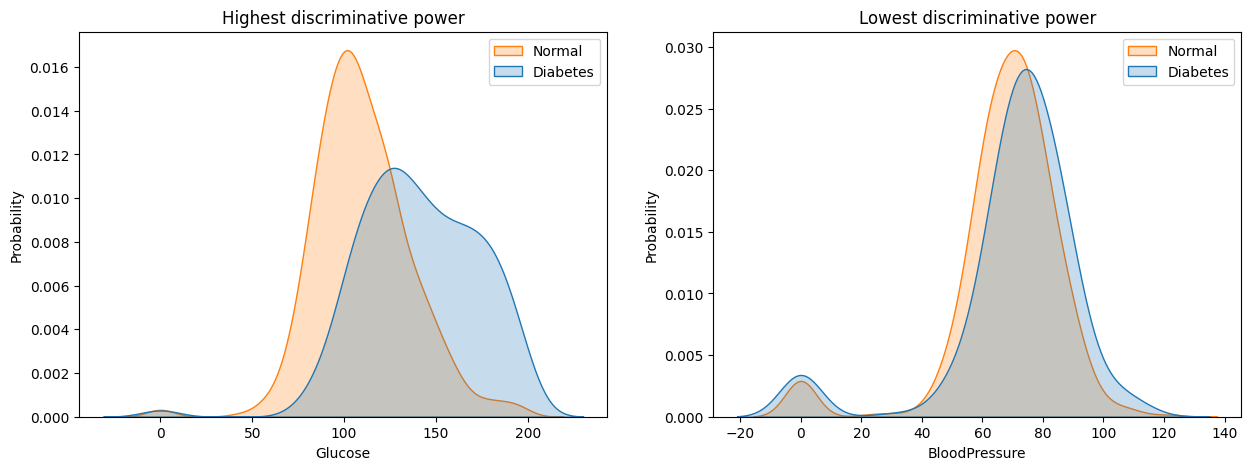

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(
    data = df,
    x = best_feature,
    hue = "Outcome",
    fill = True,
    common_norm = False
)
plt.title("Highest discriminative power")
plt.xlabel(best_feature)
plt.ylabel("Probability")
plt.legend(("Normal", "Diabetes"))

plt.subplot(1, 2, 2)
sns.kdeplot(
    data = df,
    x = worst_feature,
    hue = "Outcome",
    fill = True,
    common_norm = False
)
plt.title("Lowest discriminative power")
plt.xlabel(worst_feature)
plt.ylabel("Probability")
plt.legend(("Normal", "Diabetes"))

plt.savefig("./assets/hw1.1-plot.svg")
plt.show()

### 2) [4v]

**Using a stratified 80-20 training-testing split with a fixed seed
(`random_state=1`), assess in a single plot both the training and testing accuracies of a decision tree with minimum sample split in `{2, 5,10, 20, 30, 50, 100}` and the remaining parameters as default.**

***[optional]* Note that split thresholding of numeric variables in decision trees is non- deterministic in sklearn, hence you may opt to average the results using 10 runs per parameterization.**

In [7]:
MIN_SAMPLES_SPLIT = [2, 5, 10, 20, 30, 50, 100] 
runs = 10  

X_train, X_test, y_train, y_test = model_selection.train_test_split(
            X, y, train_size = 0.8, stratify = y, random_state = 1 
        )

average_training_accuracy = []  
average_test_accuracy = []  

for min_samples_split in MIN_SAMPLES_SPLIT:
    train_acc_list = []
    test_acc_list = []

    for _ in range(runs):
        predictor = tree.DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 1)
        predictor.fit(X_train, y_train)
        
        y_train_pred = predictor.predict(X_train)
        y_test_pred = predictor.predict(X_test)

        train_acc = metrics.accuracy_score(y_train, y_train_pred)
        test_acc = metrics.accuracy_score(y_test, y_test_pred)

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    average_training_accuracy.append(np.mean(train_acc_list))
    average_test_accuracy.append(np.mean(test_acc_list))

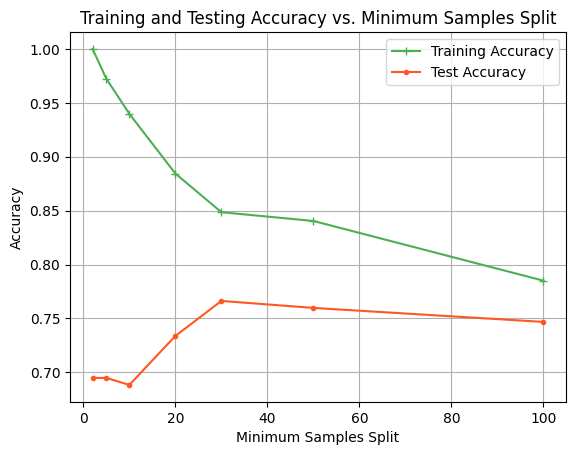

In [8]:
plt.plot(
    MIN_SAMPLES_SPLIT,
    average_training_accuracy,  
    label = "Training Accuracy",
    marker="+",
    color="#4caf50",
)
plt.plot(
    MIN_SAMPLES_SPLIT,
    average_test_accuracy,  
    label = "Test Accuracy",
    marker = ".",
    color = "#ff5722",
)

plt.xlabel("Minimum Samples Split")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs. Minimum Samples Split")
plt.legend()
plt.grid(True)

plt.savefig("./assets/hw1.2-plot.svg") 
plt.show()


In [9]:
### 3) [2V]

**Critically analyze these results, including the generalization capacity across settings.**

SyntaxError: invalid syntax (3252821755.py, line 3)

In [ ]:
In the results above, you can see that the accuracy increases along with the depth limit. However the testing accuracy eventually starts to decrease, which indicates overffiting.
Looking at the gap between the training and testing accuracy, you can assess the generalization capacity. A good gap should be small with well balanced accuracy values from both training and testing. So, the most benefitial depth limit would probably be 8.

In [ ]:
### 4) [2V]

**To deploy the predictor, a healthcare provider opted to learn a single decision tree (´random_state=1´) using *all* available data and ensuring that the maximum depth would be 3 in order to avoid overfitting risks.**

In [ ]:
i. Plot the decision tree.

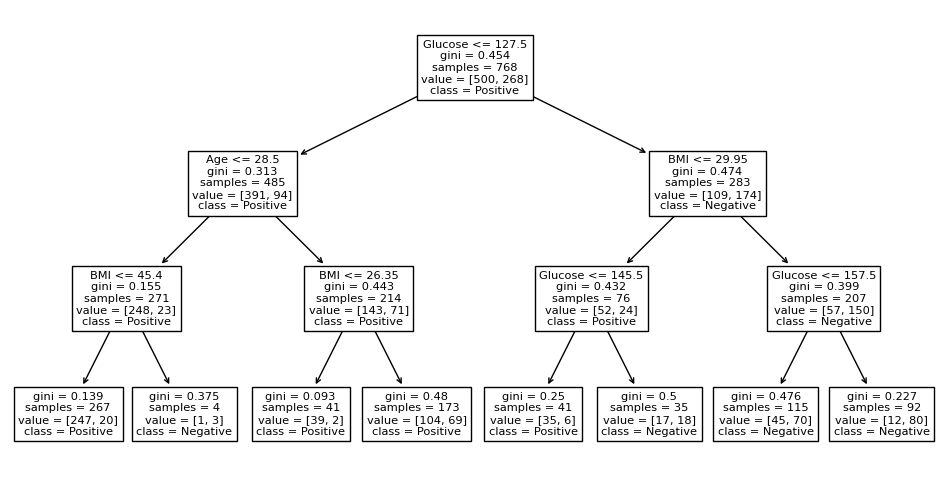

In [13]:
predictor = tree.DecisionTreeClassifier( max_depth = 3, random_state = 1)
predictor.fit(X, y)

# Define class names manually
class_names = ["Positive", "Negative"]  # Adjust based on your dataset

# Plotting the decision tree
figure = plt.figure(figsize = (12, 6))
tree.plot_tree(predictor, feature_names = X.columns.values.tolist(), class_names = class_names)

plt.show()

In [ ]:
ii. Explain what characterizes diabetes by identifying the conditional associations together with their posterior probabilities.

In [ ]:
blah blah blah